In [1]:
!pip install Lifetimes

     -------------------------------------- 584.2/584.2 kB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 49.3/49.3 kB 1.3 MB/s eta 0:00:00
     -------------------------------------- 115.3/115.3 kB 3.4 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 20,15
import seaborn as sns
import lifetimes
from lifetimes.plotting import plot_probability_alive_matrix



import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('C:/Users/user.DESKTOP-OMQ89VA/Downloads/online_retail_II.csv/online_retail_II.csv', parse_dates=['InvoiceDate'])
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [6]:
df['Customer ID'].nunique()

5942

In [7]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [8]:
# Feature selection
features = ['Customer ID', 'Invoice', 'InvoiceDate', 'Quantity', 'Price']
df = df[features]
df['TotalSales'] = df.Quantity * df.Price

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Customer ID  824364 non-null   float64       
 1   Invoice      1067371 non-null  object        
 2   InvoiceDate  1067371 non-null  datetime64[ns]
 3   Quantity     1067371 non-null  int64         
 4   Price        1067371 non-null  float64       
 5   TotalSales   1067371 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 48.9+ MB


In [9]:
df[df.Quantity < 0]

,Customer ID,Invoice,InvoiceDate,Quantity,Price,TotalSales
178,16321.0,C489449,2009-12-01 10:33:00,-12,2.95,-35.40
179,16321.0,C489449,2009-12-01 10:33:00,-6,1.65,-9.90
180,16321.0,C489449,2009-12-01 10:33:00,-4,4.25,-17.00
181,16321.0,C489449,2009-12-01 10:33:00,-6,2.10,-12.60
182,16321.0,C489449,2009-12-01 10:33:00,-12,2.95,-35.40
...,...,...,...,...,...,...
1065910,14397.0,C581490,2011-12-09 09:57:00,-11,0.83,-9.13
1067002,15498.0,C581499,2011-12-09 10:28:00,-1,224.69,-224.69
1067176,15311.0,C581568,2011-12-09 11:57:00,-5,10.95,-54.75
1067177,17315.0,C581569,2011-12-09 11:58:00,-1,1.25,-1.25


In [10]:
df.describe()

,Customer ID,Quantity,Price,TotalSales
count,824364.000000,1.067371e+06,1.067371e+06,1.067371e+06
mean,15324.638504,9.938898e+00,4.649388e+00,1.806987e+01
std,1697.464450,1.727058e+02,1.235531e+02,2.924202e+02
min,12346.000000,-8.099500e+04,-5.359436e+04,-1.684696e+05
25%,13975.000000,1.000000e+00,1.250000e+00,3.750000e+00
50%,15255.000000,3.000000e+00,2.100000e+00,9.900000e+00
75%,16797.000000,1.000000e+01,4.150000e+00,1.770000e+01
max,18287.000000,8.099500e+04,3.897000e+04,1.684696e+05


In [11]:
df = df[df.TotalSales > 0]

In [12]:
df.describe()

,Customer ID,Quantity,Price,TotalSales
count,805549.000000,1.041671e+06,1.041671e+06,1.041671e+06
mean,15331.954970,1.096345e+01,4.077038e+00,2.013397e+01
std,1696.737039,1.265149e+02,5.144898e+01,2.031167e+02
min,12346.000000,1.000000e+00,1.000000e-03,1.000000e-03
25%,13982.000000,1.000000e+00,1.250000e+00,3.900000e+00
50%,15271.000000,3.000000e+00,2.100000e+00,9.960000e+00
75%,16805.000000,1.000000e+01,4.130000e+00,1.770000e+01
max,18287.000000,8.099500e+04,2.511109e+04,1.684696e+05


In [13]:
df['A'] = df.Invoice.apply(lambda x: 'C' in x)
idx = df[df['A'] == True].index

In [14]:
df = df.drop(index=idx)
df.describe()

,Customer ID,Quantity,Price,TotalSales
count,805549.000000,1.041670e+06,1.041670e+06,1.041670e+06
mean,15331.954970,1.096346e+01,4.076683e+00,2.013363e+01
std,1696.737039,1.265150e+02,5.144773e+01,2.031165e+02
min,12346.000000,1.000000e+00,1.000000e-03,1.000000e-03
25%,13982.000000,1.000000e+00,1.250000e+00,3.900000e+00
50%,15271.000000,3.000000e+00,2.100000e+00,9.960000e+00
75%,16805.000000,1.000000e+01,4.130000e+00,1.770000e+01
max,18287.000000,8.099500e+04,2.511109e+04,1.684696e+05


In [15]:
df.columns

Index(['Customer ID', 'Invoice', 'InvoiceDate', 'Quantity', 'Price',
       'TotalSales', 'A'],
      dtype='object')

In [16]:
#Aggregate Model-
customer = df.groupby('Customer ID').agg({'InvoiceDate': lambda x:(x.max() - x.min()).days,
                                         'Invoice': lambda x:len(x),
                                         'TotalSales': lambda x : sum(x)})
customer.columns = ['Age', 'Frequency', 'TotalSales']
customer

,Age,Frequency,TotalSales
Customer ID,,,
12346.0,400,34,77556.46
12347.0,402,253,5633.32
12348.0,362,51,2019.40
12349.0,570,175,4428.69
12350.0,0,17,334.40
...,...,...,...
18283.0,654,986,2736.65
18284.0,0,28,461.68
18285.0,0,12,427.00


In [17]:
# Calculating the necessary variables for CLV calculation
Average_sales = round(np.mean(customer['TotalSales']),2)
print(f"Average sales: ${Average_sales}")

Purchase_freq = round(np.mean(customer['Frequency']), 2)
print(f"Purchase Frequency: {Purchase_freq}")

Retention_rate = customer[customer['Frequency']>1].shape[0]/customer.shape[0]
churn = round(1 - Retention_rate, 2)
print(f"Churn: {churn}%")

Average sales: $3018.62
Purchase Frequency: 137.04
Churn: 0.02%


In [18]:
# Calculating the CLV
Profit_margin = 0.05 

CLV = round(((Average_sales * Purchase_freq/churn)) * Profit_margin, 2)
print(f"The Customer Lifetime Value (CLV) for each customer is: ${CLV}")

The Customer Lifetime Value (CLV) for each customer is: $1034179.21


<AxesSubplot:xlabel='TotalSales', ylabel='Count'>

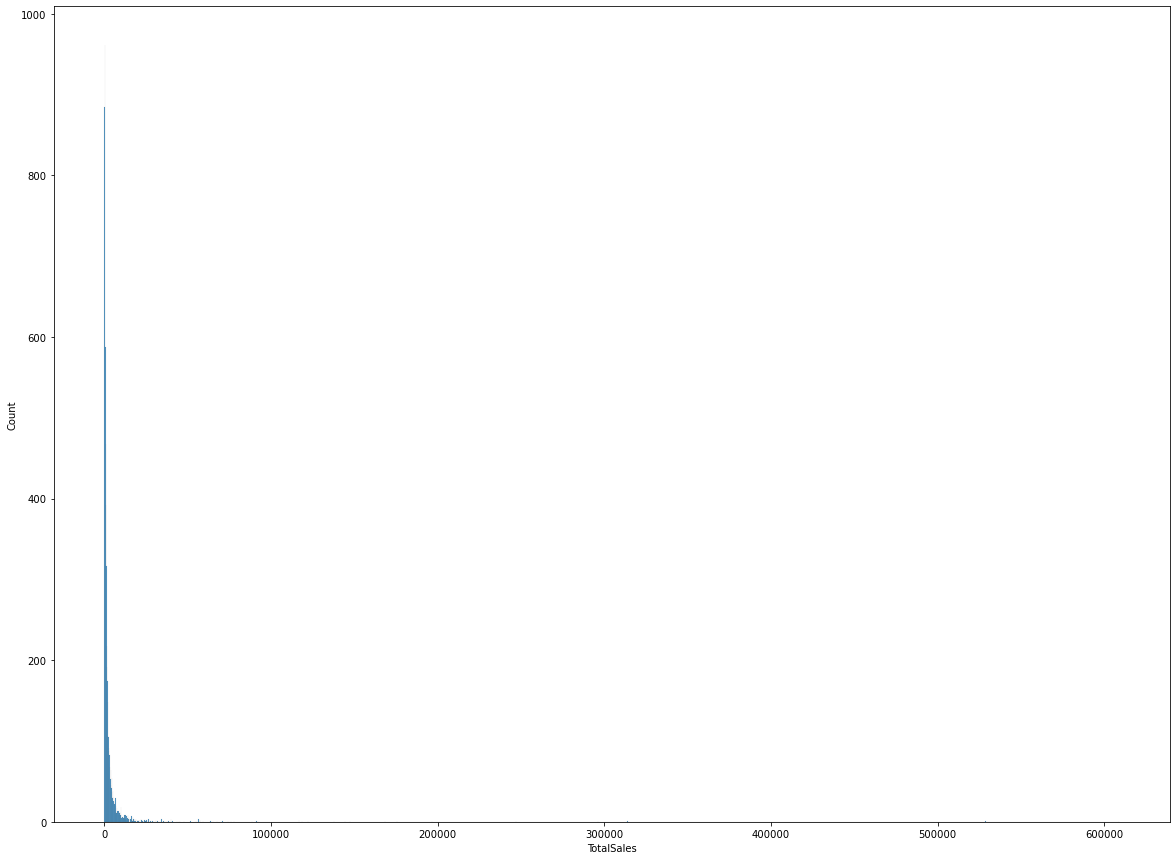

In [19]:
sns.histplot(customer['TotalSales'])

In [20]:
customer['TotalSales'].describe()

count      5878.000000
mean       3018.616737
std       14737.731040
min           2.950000
25%         348.762500
50%         898.915000
75%        2307.090000
max      608821.650000
Name: TotalSales, dtype: float64

In [21]:
#Cohort Model-
customer = df.groupby('Customer ID').agg({'InvoiceDate': lambda x:x.min().month,
                                         'Invoice': lambda x:len(x),
                                         'TotalSales': lambda x : sum(x)})
customer.columns = ['StartMonth', 'Frequency', 'TotalSales']
customer

,StartMonth,Frequency,TotalSales
Customer ID,,,
12346.0,12,34,77556.46
12347.0,10,253,5633.32
12348.0,9,51,2019.40
12349.0,4,175,4428.69
12350.0,2,17,334.40
...,...,...,...
18283.0,2,986,2736.65
18284.0,10,28,461.68
18285.0,2,12,427.00


In [22]:
# Calculating CLV for each cohort
months = ['Jan', 'Feb', 'March', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Monthly_CLV = []
CHURN = []

for i in range(1, 13):
    customer_m = customer[customer['StartMonth']==i]
    
    Average_sales = round(np.mean(customer_m['TotalSales']),2)
    
    Purchase_freq = round(np.mean(customer_m['Frequency']), 2)
    
    Retention_rate = customer_m[customer_m['Frequency']>1].shape[0]/customer_m.shape[0]
    churn = round(1 - Retention_rate, 2)
    CHURN.append(churn)
    
    CLV = round(((Average_sales * Purchase_freq/churn)) * Profit_margin, 2)
    
    Monthly_CLV.append(CLV)

Monthly_CLV, CHURN

([858115.75,
  710494.53,
  1511658.58,
  384177.34,
  372612.08,
  452404.29,
  177111.1,
  269309.57,
  307317.64,
  217623.0,
  96297.85,
  12856491.79],
 [0.03, 0.02, 0.01, 0.02, 0.02, 0.02, 0.04, 0.03, 0.02, 0.02, 0.03, 0.01])

In [23]:
monthly_clv = pd.DataFrame(zip(months, Monthly_CLV), columns=['Months', 'CLV'])
monthly_clv['churn'] = CHURN
monthly_clv.sort_values(by='CLV', ascending=False)

,Months,CLV,churn
11,Dec,12856491.79,0.01
2,March,1511658.58,0.01
0,Jan,858115.75,0.03
1,Feb,710494.53,0.02
5,Jun,452404.29,0.02
3,Apr,384177.34,0.02
4,May,372612.08,0.02
8,Sep,307317.64,0.02
7,Aug,269309.57,0.03
9,Oct,217623.00,0.02


In [24]:
df.columns

Index(['Customer ID', 'Invoice', 'InvoiceDate', 'Quantity', 'Price',
       'TotalSales', 'A'],
      dtype='object')

In [25]:
# Creating the summary data using summary_data_from_transaction_data function
summary = lifetimes.utils.summary_data_from_transaction_data(df, 'Customer ID', 'InvoiceDate', 'TotalSales' )
summary = summary.reset_index()
summary.head()

,Customer ID,frequency,recency,T,monetary_value
0,12346.0,7.0,400.0,725.0,11066.637143
1,12347.0,7.0,402.0,404.0,717.398571
2,12348.0,4.0,363.0,438.0,449.310000
3,12349.0,3.0,571.0,589.0,1120.056667
4,12350.0,0.0,0.0,310.0,0.000000


<AxesSubplot:xlabel='frequency', ylabel='Count'>

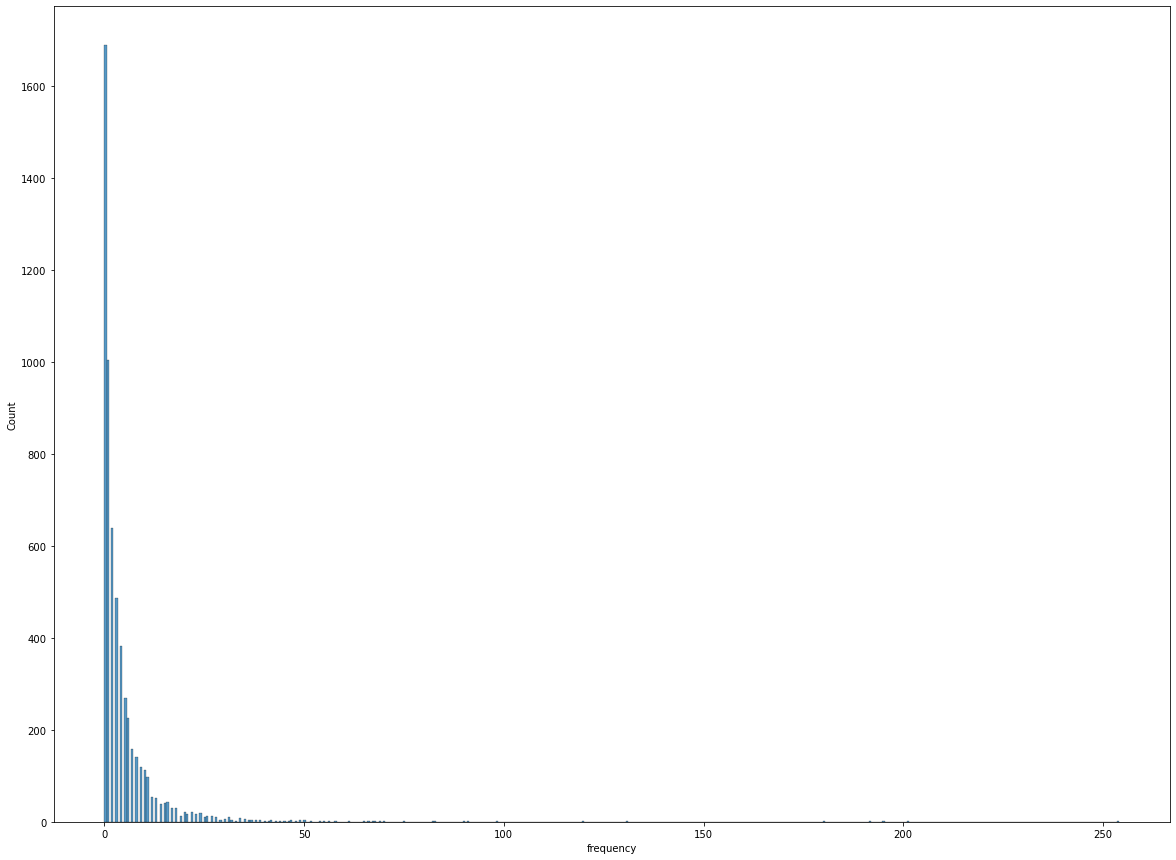

In [26]:
sns.histplot(summary.frequency)

In [27]:
one_time_buyers = round(sum(summary['frequency'] == 0)/float(len(summary))*(100),2)
print("Percentage of customers purchase the item only once:", one_time_buyers ,"%")

Percentage of customers purchase the item only once: 28.73 %


In [28]:
summary.frequency.describe()

count    5878.000000
mean        4.632358
std         9.999783
min         0.000000
25%         0.000000
50%         2.000000
75%         5.000000
max       254.000000
Name: frequency, dtype: float64

In [29]:
# Fitting the BG/NBD model
bgf = lifetimes.BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(summary['frequency'], summary['recency'], summary['T'])

<lifetimes.BetaGeoFitter: fitted with 5878 subjects, a: 0.11, alpha: 63.24, b: 2.42, r: 0.66>

In [30]:
bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,0.663527,0.015848,0.632466,0.694589
alpha,63.235539,1.936286,59.440418,67.030660
a,0.108643,0.015437,0.078387,0.138900
b,2.415697,0.524152,1.388358,3.443035


In [31]:
summary.columns

Index(['Customer ID', 'frequency', 'recency', 'T', 'monetary_value'], dtype='object')

In [32]:
# Compute the customer alive probability
summary['probability_alive'] = bgf.conditional_probability_alive(summary['frequency'], summary['recency'], summary['T'])
summary.head(10)

,Customer ID,frequency,recency,T,monetary_value,probability_alive
0,12346.0,7.0,400.0,725.0,11066.637143,0.568601
1,12347.0,7.0,402.0,404.0,717.398571,0.986835
2,12348.0,4.0,363.0,438.0,449.310000,0.959031
3,12349.0,3.0,571.0,589.0,1120.056667,0.973463
4,12350.0,0.0,0.0,310.0,0.000000,1.000000
5,12351.0,0.0,0.0,375.0,0.000000,1.000000
6,12352.0,8.0,356.0,392.0,338.261250,0.976985
7,12353.0,1.0,204.0,408.0,89.000000,0.896421
8,12354.0,0.0,0.0,232.0,0.000000,1.000000
9,12355.0,1.0,353.0,567.0,459.400000,0.917705


<AxesSubplot:title={'center':'Probability Customer is Alive,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

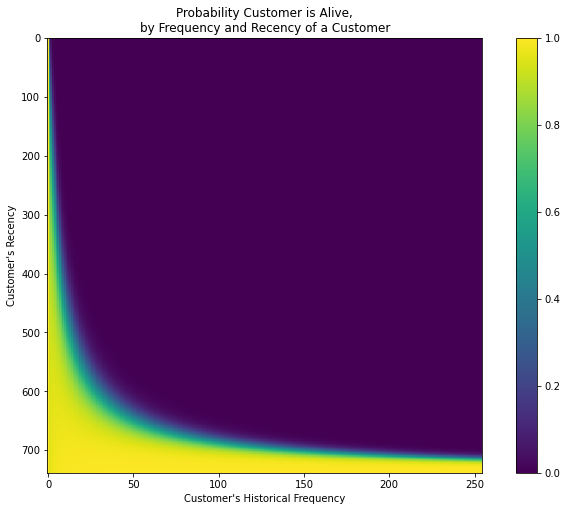

In [33]:
# Visual representation of relationship between recency and frequency

fig = plt.figure(figsize=(12,8))
plot_probability_alive_matrix(bgf)

In [34]:
#Predict future transaction for the next 30 days based on historical dataa
t = 30
summary['pred_num_txn'] = round(bgf.conditional_expected_number_of_purchases_up_to_time(t, summary['frequency'], summary['recency'], summary['T']),2)
summary.sort_values(by='pred_num_txn', ascending=False).head(10).reset_index()

,index,Customer ID,frequency,recency,T,monetary_value,probability_alive,pred_num_txn
0,2538,14911.0,254.0,737.0,738.0,1162.358268,0.999416,9.51
1,400,12748.0,201.0,735.0,735.0,280.490000,0.999464,7.56
2,2935,15311.0,195.0,738.0,738.0,594.605846,0.999447,7.31
3,5433,17841.0,192.0,736.0,737.0,366.423490,0.999286,7.20
4,2237,14606.0,180.0,735.0,736.0,170.255889,0.999250,6.76
5,739,13089.0,131.0,735.0,737.0,888.318779,0.998861,4.92
6,2158,14527.0,120.0,735.0,737.0,223.904250,0.998791,4.51
7,1789,14156.0,120.0,729.0,738.0,2607.329750,0.996515,4.49
8,622,12971.0,98.0,721.0,724.0,162.360612,0.998410,3.75
9,1434,13798.0,98.0,730.0,731.0,768.906837,0.998764,3.71


In [35]:
254*30/737.

10.33921302578019

In [36]:
# Checking the relationship between frequency and monetary_value
return_customers_summary = summary[summary['frequency']>0]
print(return_customers_summary.shape)
return_customers_summary.head()

(4189, 7)


,Customer ID,frequency,recency,T,monetary_value,probability_alive,pred_num_txn
0,12346.0,7.0,400.0,725.0,11066.637143,0.568601,0.17
1,12347.0,7.0,402.0,404.0,717.398571,0.986835,0.48
2,12348.0,4.0,363.0,438.0,449.310000,0.959031,0.27
3,12349.0,3.0,571.0,589.0,1120.056667,0.973463,0.16
6,12352.0,8.0,356.0,392.0,338.261250,0.976985,0.56


In [37]:
# Checking the relationship between frequency and monetary_value
return_customers_summary[['frequency', 'monetary_value']].corr()

,frequency,monetary_value
frequency,1.000000,0.023237
monetary_value,0.023237,1.000000


In [38]:
# Modeling the monetary value using Gamma-Gamma Model
ggf = lifetimes.GammaGammaFitter(penalizer_coef=0.001)
ggf.fit(return_customers_summary['frequency'],
       return_customers_summary['monetary_value'])

<lifetimes.GammaGammaFitter: fitted with 4189 subjects, p: 11.71, q: 0.88, v: 11.69>

In [39]:
# Summary of the fitted parameters
ggf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
p,11.712359,0.225051,11.271260,12.153459
q,0.879010,0.016861,0.845962,0.912059
v,11.685922,0.230130,11.234867,12.136978


In [40]:
# Calculating the conditional expected average profit for each customer per transaction
summary = summary[summary['monetary_value'] >0]
summary['exp_avg_sales'] = ggf.conditional_expected_average_profit(summary['frequency'],
                                       summary['monetary_value'])
summary.head()

,Customer ID,frequency,recency,T,monetary_value,probability_alive,pred_num_txn,exp_avg_sales
0,12346.0,7.0,400.0,725.0,11066.637143,0.568601,0.17,11084.664503
1,12347.0,7.0,402.0,404.0,717.398571,0.986835,0.48,720.130705
2,12348.0,4.0,363.0,438.0,449.310000,0.959031,0.27,453.402403
3,12349.0,3.0,571.0,589.0,1120.056667,0.973463,0.16,1127.835522
6,12352.0,8.0,356.0,392.0,338.261250,0.976985,0.56,340.161227


In [41]:
# Checking the expected average value and the actual average value in the data to make sure the values are good
print(f"Expected Average Sales: {summary['exp_avg_sales'].mean()}")
print(f"Actual Average Sales: {summary['monetary_value'].mean()}")

Expected Average Sales: 454.7265509121865
Actual Average Sales: 447.69345777412457


In [42]:
# Predicting Customer Lifetime Value for the next 30 days
summary['predicted_clv'] =      ggf.customer_lifetime_value(bgf,
                                                               summary['frequency'],
                                                               summary['recency'],
                                                               summary['T'],
                                                               summary['monetary_value'],
                                                               time=1,     # lifetime in months
                                                               freq='D',   # frequency in which the data is present(T)      
                                                               discount_rate=0.01) # discount rate
summary.head()

,Customer ID,frequency,recency,T,monetary_value,probability_alive,pred_num_txn,exp_avg_sales,predicted_clv
0,12346.0,7.0,400.0,725.0,11066.637143,0.568601,0.17,11084.664503,1816.753437
1,12347.0,7.0,402.0,404.0,717.398571,0.986835,0.48,720.130705,345.141798
2,12348.0,4.0,363.0,438.0,449.310000,0.959031,0.27,453.402403,119.835327
3,12349.0,3.0,571.0,589.0,1120.056667,0.973463,0.16,1127.835522,182.791656
6,12352.0,8.0,356.0,392.0,338.261250,0.976985,0.56,340.161227,187.254703


In [43]:
summary['manual_predicted_clv'] = summary['pred_num_txn'] * summary['exp_avg_sales']
summary.head()

,Customer ID,frequency,recency,T,monetary_value,probability_alive,pred_num_txn,exp_avg_sales,predicted_clv,manual_predicted_clv
0,12346.0,7.0,400.0,725.0,11066.637143,0.568601,0.17,11084.664503,1816.753437,1884.392965
1,12347.0,7.0,402.0,404.0,717.398571,0.986835,0.48,720.130705,345.141798,345.662739
2,12348.0,4.0,363.0,438.0,449.310000,0.959031,0.27,453.402403,119.835327,122.418649
3,12349.0,3.0,571.0,589.0,1120.056667,0.973463,0.16,1127.835522,182.791656,180.453684
6,12352.0,8.0,356.0,392.0,338.261250,0.976985,0.56,340.161227,187.254703,190.490287


In [44]:
# CLV in terms of profit (profit margin is 5%)
profit_margin = 0.05
summary['CLV'] = summary['predicted_clv'] * profit_margin
summary.head()

,Customer ID,frequency,recency,T,monetary_value,probability_alive,pred_num_txn,exp_avg_sales,predicted_clv,manual_predicted_clv,CLV
0,12346.0,7.0,400.0,725.0,11066.637143,0.568601,0.17,11084.664503,1816.753437,1884.392965,90.837672
1,12347.0,7.0,402.0,404.0,717.398571,0.986835,0.48,720.130705,345.141798,345.662739,17.257090
2,12348.0,4.0,363.0,438.0,449.310000,0.959031,0.27,453.402403,119.835327,122.418649,5.991766
3,12349.0,3.0,571.0,589.0,1120.056667,0.973463,0.16,1127.835522,182.791656,180.453684,9.139583
6,12352.0,8.0,356.0,392.0,338.261250,0.976985,0.56,340.161227,187.254703,190.490287,9.362735


In [45]:
# Distribution of CLV for the business in the next 30 days
summary['CLV'].describe()

count    4.189000e+03
mean     8.937231e+00
std      4.101455e+01
min      2.555459e-09
25%      1.383668e+00
50%      3.342171e+00
75%      7.833626e+00
max      1.493841e+03
Name: CLV, dtype: float64